In [11]:
import pandas as pd
import altair as alt
import missingno

HL points to address:
### Why you have decided on the design choices?
#### I have used the color scheme 'pastel1' for all charts because it has esthaetically pleasing combinations of colors which are easy to differentiate including by color-blind people

### What influenced your decisions?
#### I have mostly used bar charts because this type is appropriate for categorical data. I have tried to use pie charts as well but I kept having weird errors and I found altair's documentation difficult to follow considering the little we have been taught about it :C.

### What insights have you found from the data?
#### I have left comments about insights which can be drawn from the data throuout the code (following arrows like'#--->' ) 

# Data Dictionary

In [ ]:

# Variable    	        Definition  	                                Key
# survival    	        Survival	                                    0 = No, 1 = Yes
# pclass           	    Ticket class	                                1 = 1st, 2 = 2nd, 3 = 3rd
# sex	                Sex	
# Age	                Age in years	
# sibsp	                # of siblings / spouses aboard the Titanic	
# parch	                # of parents / children aboard the Titanic	
# ticket	            Ticket number	
# Fare	                Passenger fare	
# cabin	                Cabin number	
# embarked	            Port of Embarkation         	                C = Cherbourg, Q = Queenstown, S = Southampton


# Importing the data

In [12]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (data types, missing data and summary stats)

In [6]:
# Non-null count and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#Missing data by column

df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

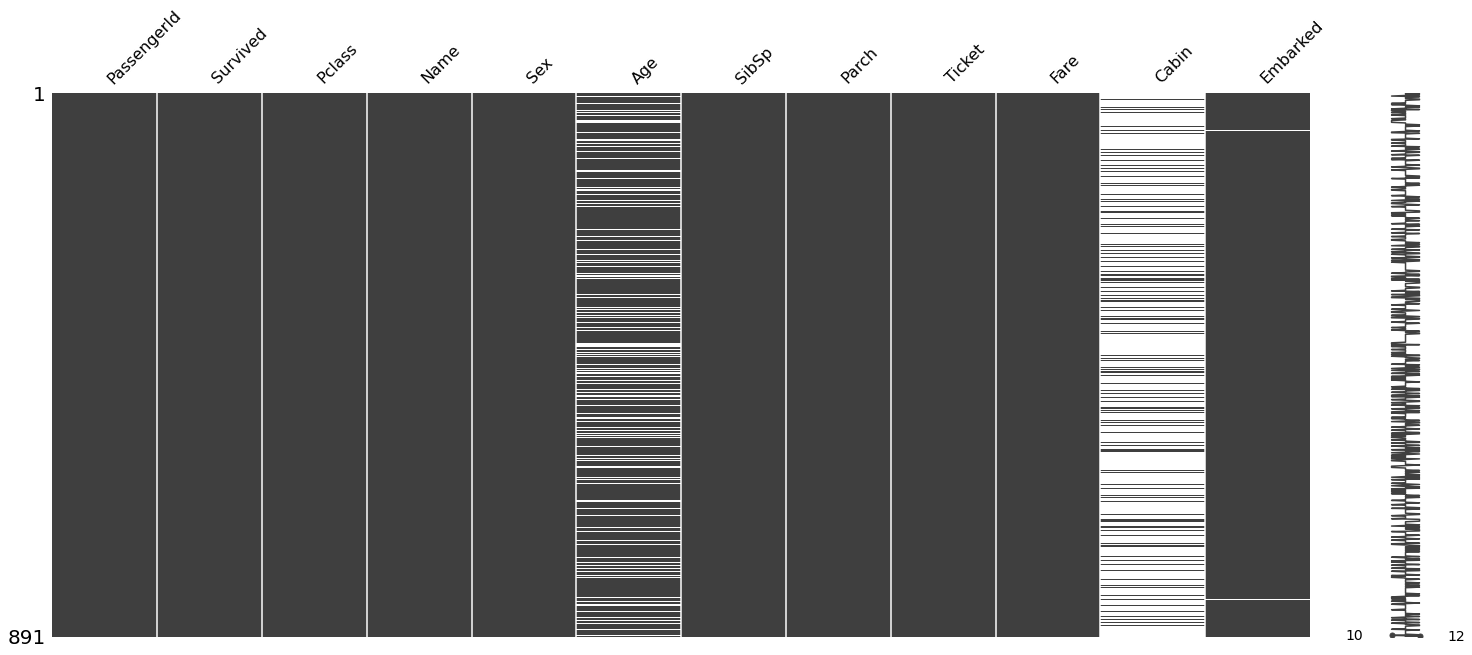

In [11]:
# Missing data matrix

missingno.matrix(df)


In [14]:
#Summary Statistics

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visual Analysis of Categorical Variables

## 1. Sex and Survival

In [15]:
# Passenger numbers by sex

df['Sex'].value_counts(dropna = False)

#---> There were more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

In [19]:
# Survival proportion by sex
# There are no missing numbers in the survived column therefore we can use the mean function to find the survival percentage
df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
#Survival rate by sex
c1 = alt.Chart(df).mark_bar().encode(
        alt.X('Sex:N', axis = alt.Axis(labels = False, title = '', ticks = False)),
        alt.Y('mean(Survived):Q', axis = alt.Axis(format = '%'), title = 'Survival Rate'),
        alt.Color('Sex', scale = alt.Scale(scheme = 'pastel1')),
    ).properties(
        title = 'Titanic Survival Rate by Sex',
        width = 125
    ).configure_title(
        anchor = 'middle',
        fontSize = 14,
        offset = 20
    ).configure_view(
        strokeWidth = 0
    )

c1


alt.Chart(...)

In [137]:
#-------> Female passengers were more likely to survive

## 2. Ticket Class and Survival

In [138]:
# Passenger numbers by ticket class 

df['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [139]:
#Survival rate by ticket class

df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [23]:
#Survival rate by ticket class
c2 = alt.Chart(df).mark_bar().encode(
        alt.X('Pclass:N', axis = alt.Axis(labels = False, title = '', ticks = False)),
        alt.Y('mean(Survived):Q', axis = alt.Axis(format = '%', title = 'Survival Rate')),
        alt.Color('Pclass:N', title = 'Ticket Class', scale = alt.Scale(scheme = 'pastel1')),
    ).properties(
        title = 'Titanic Survival Rate by Ticket Class',
        width = 150
    ).configure_title(
        anchor = 'middle',
        dx = 14,
        fontSize = 14,
        offset = 20
    ).configure_view(
        strokeWidth = 0
    )
c2

alt.Chart(...)

In [ ]:
#-------> Passengers with higher class tickets were more likely to survive than those with lower class tickets

## 3. Survival by Gender and Ticket Class

In [142]:
# Survival rates by gender and ticket class
df[['Sex', 'Survived', 'Pclass']].groupby(['Pclass','Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [24]:
c3 = alt.Chart(df).mark_bar().encode(
        alt.Column('Pclass:N', title = 'Passenger Ticket Class', header=alt.Header(titleOrient='bottom', labelOrient='bottom')),
        alt.X('Sex:N',axis = alt.Axis(labels = False, title = '', ticks = False)),
        alt.Y('mean(Survived):Q',axis = alt.Axis(format = '%', gridOpacity= 0.4), title = 'Survival Rate'),
        alt.Color('Sex', scale = alt.Scale(scheme = 'pastel1'))
    ).properties(
        title = 'Titanic - Survival Rate by Gender and Ticket Class',
        width = 150
    ).configure_title(
        anchor = 'middle',
        fontSize = 16,
        offset = 35
    ).configure_view(
        strokeWidth = 0
    )
c3       

alt.Chart(...)

In [ ]:
# ----------> Survival rates were higher for females and higher class tickets (1st class > 2nd class > 3rd class)

# 4. Survival by the Point of Embarkation

In [232]:
# Survival rates by point of embarkation

df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [26]:
#Dropping the 2 missing values in the Embarked column:
dt = df.dropna(how = 'any', subset = ['Embarked'])
dt.shape

(889, 12)

In [27]:
c4 = alt.Chart(dt).mark_bar().encode(
        alt.X('Embarked:N', axis = alt.Axis(labels = False, title = '', ticks = False)),
        alt.Y('mean(Survived):Q', axis = alt.Axis(format = '%', title = 'Survival Rate')),
        alt.Color('Embarked:N', title = 'Point of Embarkation', scale = alt.Scale(scheme = 'pastel1')),
    ).properties(
        title = 'Titanic Survival Rate by Point of Embarkation',
        width = 150
    ).configure_title(
        anchor = 'middle',
        dx = 45,
        fontSize = 14,
        offset = 20
    ).configure_view(
        strokeWidth = 0
    )
c4

alt.Chart(...)

In [ ]:
#-------> Survival rates were highest for passengers which embarked from Cherbourg and lowest for passengers embarking in Southampton 
# C = Cherbourg, Q = Queenstown, S = Southampton

#This might be because most 1st class passengers embarked in Cherbourg or most 3rd class passengers embarked in Southampton 


In [28]:
c5 = alt.Chart(dt).mark_bar().encode(
        alt.Column('Embarked:N', title = 'Point of Embarkation', header=alt.Header(titleOrient='bottom', labelOrient='bottom')),
        alt.X('Pclass:N',axis = alt.Axis(labels = False, title = '', ticks = False)),
        alt.Y('count(Embarked):N',title = 'Number of Passengers'),
        alt.Color('Pclass:N', scale = alt.Scale(scheme = 'pastel1'))
    ).properties(
        title = 'Titanic - Number of Passengers by Point of Embarkation and Ticket Class',
        width = 150
    ).configure_title(
        anchor = 'middle',
        fontSize = 16,
        offset = 35
    ).configure_view(
        strokeWidth = 0
    )
c5

alt.Chart(...)

In [ ]:
#---------> Indeed the relationship seems to be due to the fact that in Southampton have boarded the most 3rd class passengers and in Cherbourg the most 1st class passengers.